In [1]:
import os
import numpy as np
import pandas as pd
import random

### Data Loading and Formatting

In [2]:
# Load training scaled datasets
data_path = "../data/preprocessed/preprocessed_data_20250720_131842"

X_train = pd.read_csv(os.path.join(data_path, 'X_train_scaled.csv'))
y_train = pd.read_csv(os.path.join(data_path, 'y_train_scaled.csv'))

# Load test datasets
X_test = pd.read_csv(os.path.join(data_path, 'X_test_scaled.csv'))
y_test = pd.read_csv(os.path.join(data_path, 'y_test_scaled.csv'))

In [3]:
# Check X_train and y_train datasets
X_train.head()

,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,...,TUE,CALC,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age_Category_Young Adult,Age_Category_Adult,Age_Category_Senior
0,3.319501,2.315363,1,1,3.000000,3.666667,3.666667,0,5.000000,0,...,5.000000,3.666667,True,False,False,True,False,True,False,False
1,3.243115,2.019406,0,0,3.000000,3.666667,2.333333,0,5.000000,0,...,3.000000,1.000000,True,False,False,True,False,True,False,False
2,2.861183,1.536011,1,1,5.000000,3.666667,2.333333,0,3.000000,0,...,1.000000,2.333333,True,False,False,True,False,True,False,False
3,3.811803,2.600009,1,1,4.587122,4.718136,2.333333,0,3.858118,0,...,1.786716,2.333333,True,False,False,True,False,True,False,False
4,1.605530,1.600435,0,1,2.945090,2.786152,2.333333,0,2.422148,1,...,3.382106,2.333333,False,False,False,True,False,False,False,False


In [4]:
y_train.head()

,NObeyesdad
0,5
1,1
2,1
3,5
4,5


In [5]:
# Flatten y_train and y_test to be (n_samples, )
y_train_reshaped = np.ravel(y_train) 
y_test_reshaped = np.ravel(y_test)
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(1688,)
(423,)


### Experiment with K Nearest Neighbors for a baseline model


In [6]:
# Develop baseline model with KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Hyperparameter tuning for KNN model
knn_param = {'n_neighbors': range(1, 11, 1),
            'metric': ['euclidean', 'manhattan'],
            'weights': ['uniform', 'distance']
}

# Create a random forest classifier
knn = KNeighborsClassifier()

# Use GridSearch CV to find the best hyperparameters
knn_search = GridSearchCV(knn,           
            param_grid = knn_param,  
            cv = 10,
            scoring = 'accuracy')

# Fit the Grid search CV object to the data
knn_search.fit(X_train, y_train_reshaped)

knn_results = knn_search.cv_results_

In [7]:
# Hyperparameters for best KNN model
best_knn = knn_search.best_estimator_
print('Best hyperparameters:',  knn_search.best_params_)
print('Best CV accuracy:', knn_search.best_score_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Best CV accuracy: 0.8767821921668076


In [8]:
knn_results = knn_search.cv_results_
knn_search_results = pd.concat([pd.DataFrame(knn_results["params"]),
                               pd.DataFrame(knn_results["mean_test_score"], columns=["Accuracy"])],axis=1)
print(knn_search_results)

       metric  n_neighbors   weights  Accuracy
0   euclidean            1   uniform  0.825257
1   euclidean            1  distance  0.825257
2   euclidean            2   uniform  0.800983
3   euclidean            2  distance  0.825257
4   euclidean            3   uniform  0.809862
5   euclidean            3  distance  0.825257
6   euclidean            4   uniform  0.803364
7   euclidean            4  distance  0.823507
8   euclidean            5   uniform  0.803934
9   euclidean            5  distance  0.821721
10  euclidean            6   uniform  0.796841
11  euclidean            6  distance  0.821735
12  euclidean            7   uniform  0.785577
13  euclidean            7  distance  0.808679
14  euclidean            8   uniform  0.769565
15  euclidean            8  distance  0.802751
16  euclidean            9   uniform  0.775493
17  euclidean            9  distance  0.800972
18  euclidean           10   uniform  0.766019
19  euclidean           10  distance  0.792100
20  manhattan

In [9]:
# Generate predictions with the best model
y_test_pred_knn = best_knn.predict(X_test)

test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("Test Accuracy:", test_accuracy_knn)

Test Accuracy: 0.8794326241134752


In [10]:

knn_report = classification_report(y_test, y_test_pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.76      0.67      0.72        58
           2       0.89      0.93      0.91        70
           3       0.97      0.98      0.98        60
           4       0.98      1.00      0.99        65
           5       0.79      0.72      0.76        58
           6       0.78      0.88      0.83        58

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.87       423
weighted avg       0.88      0.88      0.88       423



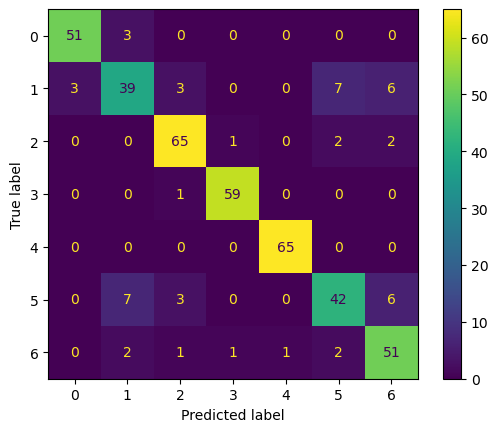

In [11]:
# Create the confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot();

**Summary for KNN model**
|Result|Value|
|---|---|
|Best hyperparameters| {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}|
|Best CV accuracy| 0.8767821921668076|
|Test Accuracy| 0.8794326241134752|

### Experiment with Random Forest Classifier for more advanced model

In [12]:
# Develop baseline model with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning for n_estimators and max_depth
param_dist = {'n_estimators': range(50, 501, 50),
              'max_depth': range(1, 26, 5)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Use GridSearch CV to find the best hyperparameters
GridCV_search = GridSearchCV(rf,           
                            param_grid = param_dist,  
                            cv = 10,
                            scoring = 'accuracy')

# Fit the random search object to the data
GridCV_search.fit(X_train, y_train_reshaped)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 26, 5),
                         'n_estimators': range(50, 501, 50)},
             scoring='accuracy')

In [13]:
# Summary of GridCV search during hyperparameter tuning
GridCV_results = GridCV_search.cv_results_
CV_search_results = pd.concat([pd.DataFrame(GridCV_results["params"]),
                               pd.DataFrame(GridCV_results["mean_test_score"], columns=["Accuracy"])],axis=1)
print(CV_search_results)

    max_depth  n_estimators  Accuracy
0           1            50  0.469808
1           1           100  0.482234
2           1           150  0.482812
3           1           200  0.469798
4           1           250  0.481044
5           1           300  0.482245
6           1           350  0.478684
7           1           400  0.476321
8           1           450  0.486383
9           1           500  0.500011
10          6            50  0.854286
11          6           100  0.875021
12          6           150  0.882129
13          6           200  0.882125
14          6           250  0.888053
15          6           300  0.890420
16          6           350  0.889240
17          6           400  0.890423
18          6           450  0.889236
19          6           500  0.889240
20         11            50  0.939582
21         11           100  0.943139
22         11           150  0.946105
23         11           200  0.944319
24         11           250  0.944914
25         1

In [14]:
# Best model with hyperparameters max_depth = 21 and n_estimators = 450
best_rf = GridCV_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  GridCV_search.best_params_)
print('Best CV accuracy:', GridCV_search.best_score_)

Best hyperparameters: {'max_depth': 21, 'n_estimators': 450}
Best CV accuracy: 0.9526134122287967


In [15]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.80      0.97      0.88        58
           2       0.92      0.97      0.94        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.86      0.90        58
           6       0.96      0.88      0.92        58

    accuracy                           0.94       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



In [16]:
# Calculate test accuracy
test_accuracy = accuracy_score(y_test.values.ravel(), y_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

Test Accuracy: 0.941


In [10]:
from sklearn.metrics import mean_squared_error as MSE
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 0.86


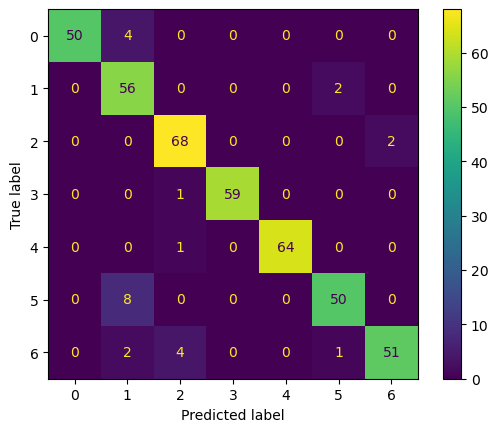

In [11]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

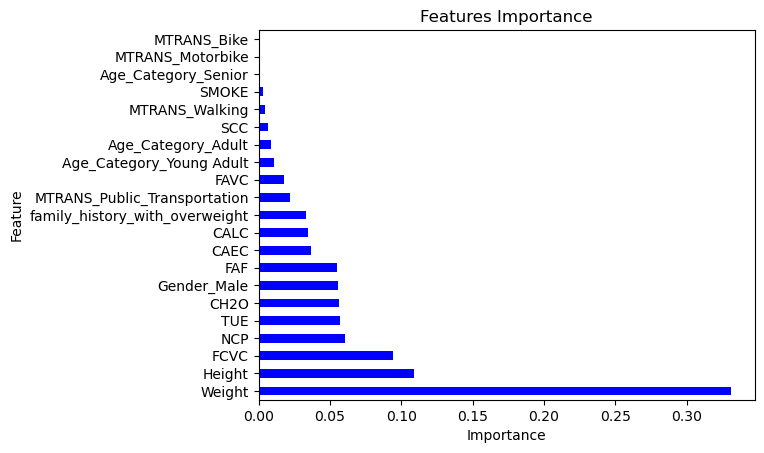

In [12]:
# Create a series containing feature importances from the model and feature names from the training data
import matplotlib.pyplot as plt
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importance.plot(kind='barh', color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features Importance')
plt.show()

**Summary for Random Forest Model**
|Result|Value|
|---|---|
|Best hyperparameters| {'max_depth': 21, 'n_estimators': 450}|
|Best CV accuracy|0.9526134122287967|
|Test Accuracy| 0.941|